In [56]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [79]:
amp=1
sr=10000
dur=0.5
freq=440.0

440이 라 음; 옥타브 만들려면 주파수 배로 곱하면 됨

In [57]:
t=np.arange(1,sr*dur+1)/sr

In [62]:
theta=t*2*np.pi*freq

In [80]:
s=amp*np.cos(theta)

sin으로 하든 cos로 하든 소리가 다르게 들리진 않음; 둘다 라

cos와 sin은 pi/2(90도) 차이밖에 없음

얼만큼 이동하든 소리 다 똑같음 

각도=phase; 우리 귀는 phase를 인식 X, freq에만 sensitive함

theta가 어떻게 변하는가는 눈으로 보면 알아서/theta 도는 게 너무 빨라서 x축에 t

대괄호: 일부만 가져오기; 0부터 1000번째까지

#여기있는 점들의 개수는 몇 개인가? 1000개

<IPython.core.display.Javascript object>


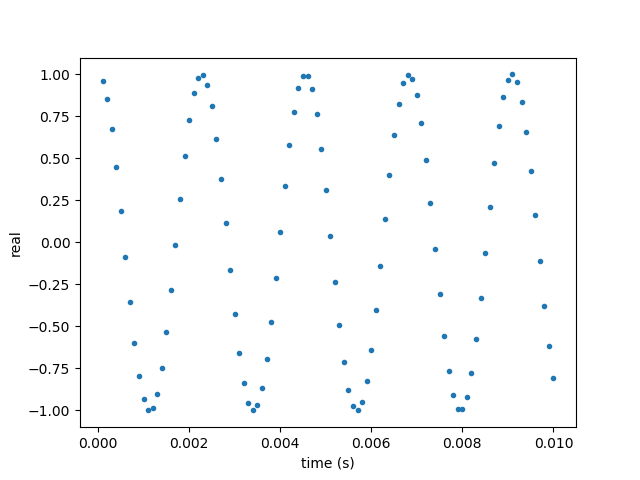

Text(0, 0.5, 'real')

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

<IPython.core.display.Javascript object>


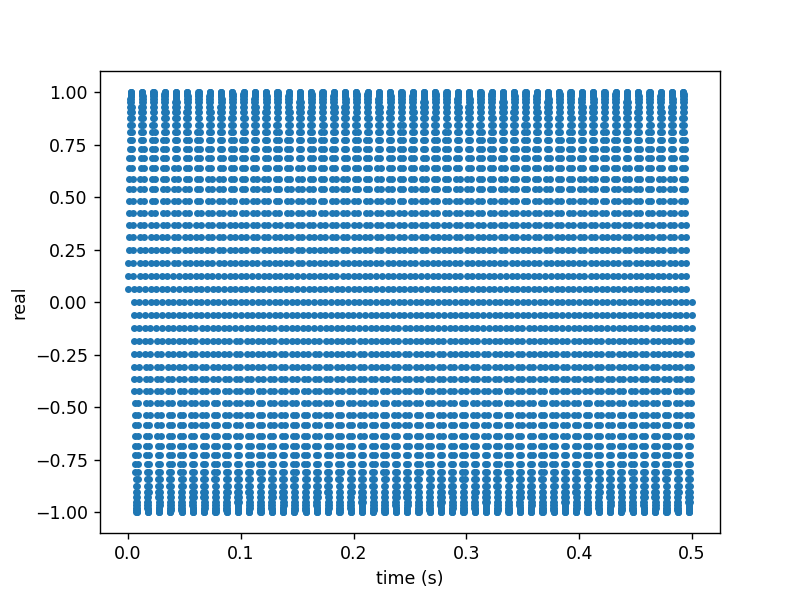

Text(0, 0.5, 'real')

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s, '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

이렇게 하면 너무 촘촘해져서 태극문양 아예 안 보여서 0:1000처럼 일부만 가져오는 거

c=complex

In [87]:
c = amp*np.exp(theta*1j)
c                 #complex no.

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

<IPython.core.display.Javascript object>


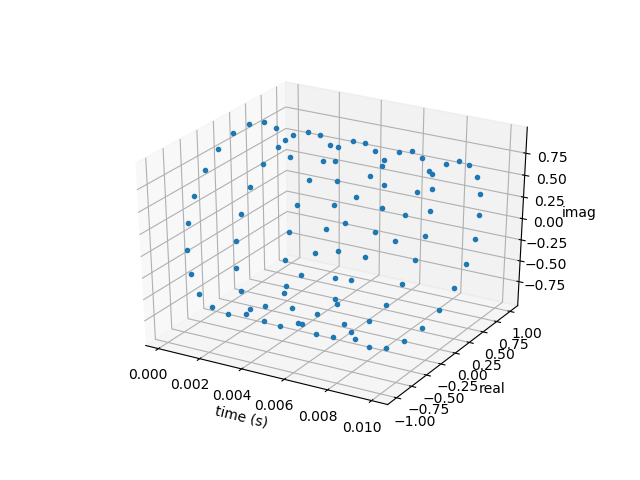

Text(0.5, 0, 'imag')

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

amplitude 곱해서 위아래 최댓값 +-2됨

*이 원의 직경이 얼마일까요? 4

*스프링의 범위와 원의 직경과 같을까요? True

In [89]:
ipd.Audio(s, rate=sr)

In [107]:
import sounddevice as sd
sd.play(s,sr)

# Generate pulse train

<IPython.core.display.Javascript object>


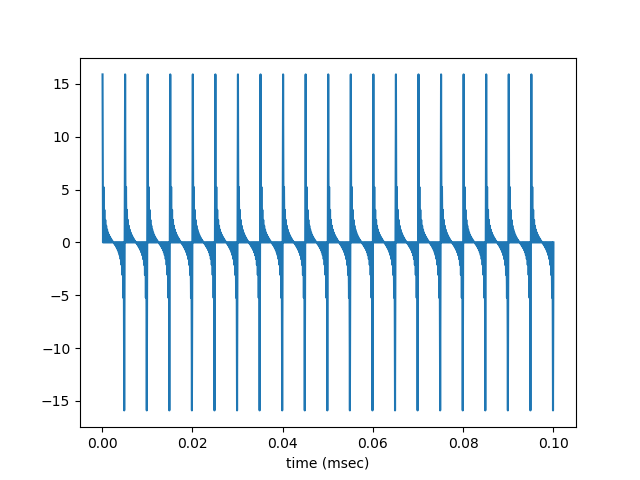

In [91]:
# generate samples, note conversion to float32 array
F0 = 200; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):  #F0부터 Fend만큼 increment 100으로. +1:제일 마지막거 포함하기 위해서
    theta = t * 2*np.pi * freq     #위에서 한 거
    
    s = s +amp*np.sin(theta)    #s에 뭐 더한 걸 계속 새로 s로 정의, #제일 처음 루프에서 s값 뭔지 모르게 됨, 그래서 앞에서 s정의해주는거
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s,rate=sr)

In [92]:
sd.play(s,sr)

처음부터 끝까지 할수있는 걸 다 합한 것임 

왜 pulse train? sin wave부드러웠던 게 다 없어져서 일자 됨

더 많이 더하면 선 하나만 남아있고 00000

이 그림은 wave form이지 spectrum 아님

# 산맥을 만들자!

In [104]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance(srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1,1,a2])
    b = np.array([sum(a)])
    return a,b

In [106]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
sd.play(s,sr)

resonance 속에서 -hz2w 불러온 것임  resonance만 쓴다? 

resonance 쓸 때 처음에 sr넣는다. 산맥의 위치 적어넣어야 함

BWG: 어떤 산을 만들 때 이게 얼마나 뚱뚱하냐 뾰족하냐 뾰족하면 w작음; 산택 shape 결정

100정도면 꽤 뚱뚱한 것

RG에 0넣은 것: gradually decrease한 것을 만들 때 제일 앞에 있는 거 freq=0HZ

=0 위치에 왼쪽 무시하고 오른쪽에 뚱뚱한 산 내리막길 만들어라



In [108]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [109]:
sd.play(s,sr)

In [112]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
sd.play(s,sr)

In [113]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [114]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

3500까지 만들어서 praat에서 보면 부드러운 산맥 몇 개 만들어져있음

In [117]:
s = lfilter(np.array([1, -1]), np.array([1]), s)    #입술의 소리 확장, 공명 기능 더해주는 거
ipd.Audio(s, rate=sr)